## **라이브러리 불러오기**

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **데이터 로드**

In [3]:
import pandas as pd
df_2023 = pd.read_excel('/content/drive/MyDrive/tour/data/sav/2023.xlsx')
df_2024 = pd.read_excel('/content/drive/MyDrive/tour/data/sav/2024.xlsx')

## **1. 국가명 맵핑**

In [4]:
# 공백 제거 후 국가명 컬럼 생성

country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 국가 코드 매핑 (공백 없는 국가명 기준)
country_map_fixed = {
    '일본': '일본', '중국': '중국', '홍콩': '홍콩', '싱가포르': '싱가포르', '대만': '대만',
    '태국': '태국', '말레이시아': '말레이시아', '호주': '호주', '미국': '미국', '캐나다': '캐나다',
    '영국': '영국', '독일': '독일', '프랑스': '프랑스', '러시아': '러시아', '중동': '중동',
    '인도': '인도', '필리핀': '필리핀', '인도네시아': '인도네시아', '베트남': '베트남', '몽골': '몽골',
    '기타': '기타'
}

# 공백 제거 후 국가명 매핑
df_2023["국가명"] = df_2023["D_NAT"].astype(str).str.replace(" ", "").map(country_map_fixed)
df_2024["국가명"] = df_2024["D_NAT"].astype(str).str.replace(" ", "").map(country_map_fixed)


## **2. 활동명 맵핑 (Q8a~)**

In [5]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [row[col] for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [6]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
# 3. 만족활동 추출 함수 (활동명이 문자열로 이미 들어간 경우)
def get_q8b_satisfaction(row):
    return [row[col] for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


## **3. 지역명 맵핑**

In [7]:
import pandas as pd

# 1. 지역 컬럼 정의
region_cols = [f"Q9_2a{str(i).zfill(2)}" for i in range(1, 18)]

# 2. 지역 코드 → 지역명 매핑
region_map = {
    1: "서울", 2: "경기", 3: "인천", 4: "강원", 5: "대전",
    6: "충북", 7: "충남", 8: "세종", 9: "경북", 10: "경남",
    11: "대구", 12: "울산", 13: "부산", 14: "광주", 15: "전북",
    16: "전남", 17: "제주"
}

# 3. 지역 리스트 추출 함수 (수정 버전)
def extract_visited_regions(row):
    visited = []
    for col in region_cols:
        val = row.get(col)
        if pd.notna(val):
            val_str = str(val).strip()
            if val_str and val_str not in visited:
                visited.append(val_str)
    return visited


# 4. 적용
df_2023["방문지역"] = df_2023.apply(extract_visited_regions, axis=1)
df_2024["방문지역"] = df_2024.apply(extract_visited_regions, axis=1)

# 5. 확인
print(df_2023[["pnid", "방문지역"]].head(10))
print(df_2024[["pnid", "방문지역"]].head(10))

   pnid          방문지역
0     6      [서울, 강원]
1     7          [서울]
2     8          [인천]
3    10          [서울]
4    11      [서울, 인천]
5    12          [서울]
6    14      [서울, 강원]
7    16          [경기]
8    19  [서울, 강원, 부산]
9    20      [서울, 강원]
   pnid      방문지역
0    57      [서울]
1    58      [서울]
2    59      [서울]
3    60      [서울]
4    61  [서울, 경기]
5    63  [서울, 경기]
6    64  [서울, 경기]
7    66      [서울]
8    68      [서울]
9    69      [서울]


## **4. 클러스터링1 국가 필터**

In [8]:
# 클러스터1 국가 리스트
cluster1_countries = ["미국", "영국", "독일", "프랑스", "캐나다", "호주", "기타"]

# 공통 국가 필터링 함수
def filter_cluster1(df):
    return df[df["국가명"].isin(cluster1_countries)].copy()

# 연도별 필터링
df_cluster1_2023 = filter_cluster1(df_2023)
df_cluster1_2024 = filter_cluster1(df_2024)

### 계절 컬럼 추가 (계절 분석 시 사용)

In [9]:
import pandas as pd

# 월 → 계절 매핑 함수
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

# 각 연도별 데이터프레임에 적용
# for df in [df_cluster1_2024, df_cluster1_2023, df_cluster1_2022]:
#     df['계절'] = df['D_MON'].apply(month_to_season)

for df in [df_cluster1_2024, df_cluster1_2023]:
    df['계절'] = df['D_MON'].apply(month_to_season)

In [10]:
df_cluster1_2023.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_AGE,D_MOK,D_NUM,D_GUB,weight,국가명,주요활동,만족활동,방문지역,계절
2,8,2,2회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",기타,NaN,NaN,NaN,NaN,...,15 - 19 세,기 타,2 회,개 별 여 행,244.838755,미국,[식도락(음식/미식) 관광],[식도락(음식/미식) 관광],[인천],Winter
10,21,2,2회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",대만,...,20 대,여 가/위 락/ 휴 식,2 회,개 별 여 행,244.838755,미국,"[고궁/역사 유적지 방문, K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문]","[K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문, 고궁/역사 유적지 방문]",[서울],Winter
16,30,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",계획한 여행 경비에 적합한 여행지여서,"한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",일본,...,20 대,친 구/친 지 방 문,3 회,개 별 여 행,157.875180,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문, 박물관...","[고궁/역사 유적지 방문, 자연경관 감상, 식도락(음식/미식) 관광]","[서울, 부산]",Winter
20,35,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,일본,...,30 대,사 업/전 문 활 동,1 회,개 별 여 행,363.430968,기타,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문, 스포츠...","[자연경관 감상, 식도락(음식/미식) 관광, 쇼핑]","[서울, 경기]",Winter
21,36,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",새로운 국가에 가고 싶어서,계획한 여행 경비에 적합한 여행지여서,한국에 가는 다양한 항공 노선이 있어서,NaN,...,40 대,친 구/친 지 방 문,1 회,개 별 여 행,84.905295,영국,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문, 박물관...","[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상]","[서울, 부산]",Winter


## **5. 재방문의사 맵핑**

In [11]:
df_cluster1_2023["Q13"].unique()

array(['⑤ 매우 그렇다', '④ 대체로 그렇다', '③ 보통', '② 별로 그렇지 않다', '① 전혀 그렇지 않다'],
      dtype=object)

In [12]:
q13_score_map = {
    "⑤ 매우 그렇다": 5,
    "④ 대체로 그렇다": 4,
    "③ 보통": 3,
    "② 별로 그렇지 않다": 2,
    "① 전혀 그렇지 않다": 1
}


In [13]:
df_cluster1_2023["재방문의사"] = df_cluster1_2023["Q13"].map(q13_score_map)
df_cluster1_2024["재방문의사"] = df_cluster1_2024["Q13"].map(q13_score_map)

## **6. 활동별 만족도 맵핑**

In [14]:
# 1. 항목명 매핑
q12_2023_item_mapping = {
    "Q12a01": "식도락(음식)",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "고궁/역사 유적지 방문",
    "Q12a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "Q12a06": "박물관, 전시관 관람",
    "Q12a07": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a09": "지역 축제 참여",
    "Q12a10": "유흥(나이트라이프 활동 및 카지노 등)",
    "Q12a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q12a12": "뷰티/미용 관광 (마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a13": "치료/건강검진(피부과, 성형외과, 내‧외과 입원, 수술 등)",
    "Q12a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a15": "스포츠/레포츠 참가(스키, 수영, 골프, 캠핑 등)"
}

# 2. 만족도 문자 → 점수
q12_score_map = {
    "⑤ 매우 만족": 5,
    "④ 만족": 4,
    "③ 보통": 3,
    "② 불만족": 2,
    "① 매우 불만족": 1
}

# 3. 변환 함수 정의
def extract_activity_satisfaction(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2023_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = q12_score_map.get(row[col])
            if score is not None:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 4. 적용
df_cluster1_2023["활동만족도"] = df_cluster1_2023.apply(extract_activity_satisfaction, axis=1)


In [15]:
# 1. 항목명 매핑
q12_2024_item_mapping = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}

# 2. 만족도 문자 → 점수
q12_score_map = {
    "⑤ 매우 만족": 5,
    "④ 만족": 4,
    "③ 보통": 3,
    "② 불만족": 2,
    "① 매우 불만족": 1
}

# 3. 변환 함수 정의
def extract_activity_satisfaction(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2024_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = q12_score_map.get(row[col])
            if score is not None:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 4. 적용
df_cluster1_2024["활동만족도"] = df_cluster1_2024.apply(extract_activity_satisfaction, axis=1)

## **A-1. 2023 지역별 활동만족도 (평균 만족도 TOP5, 서울 제외)**

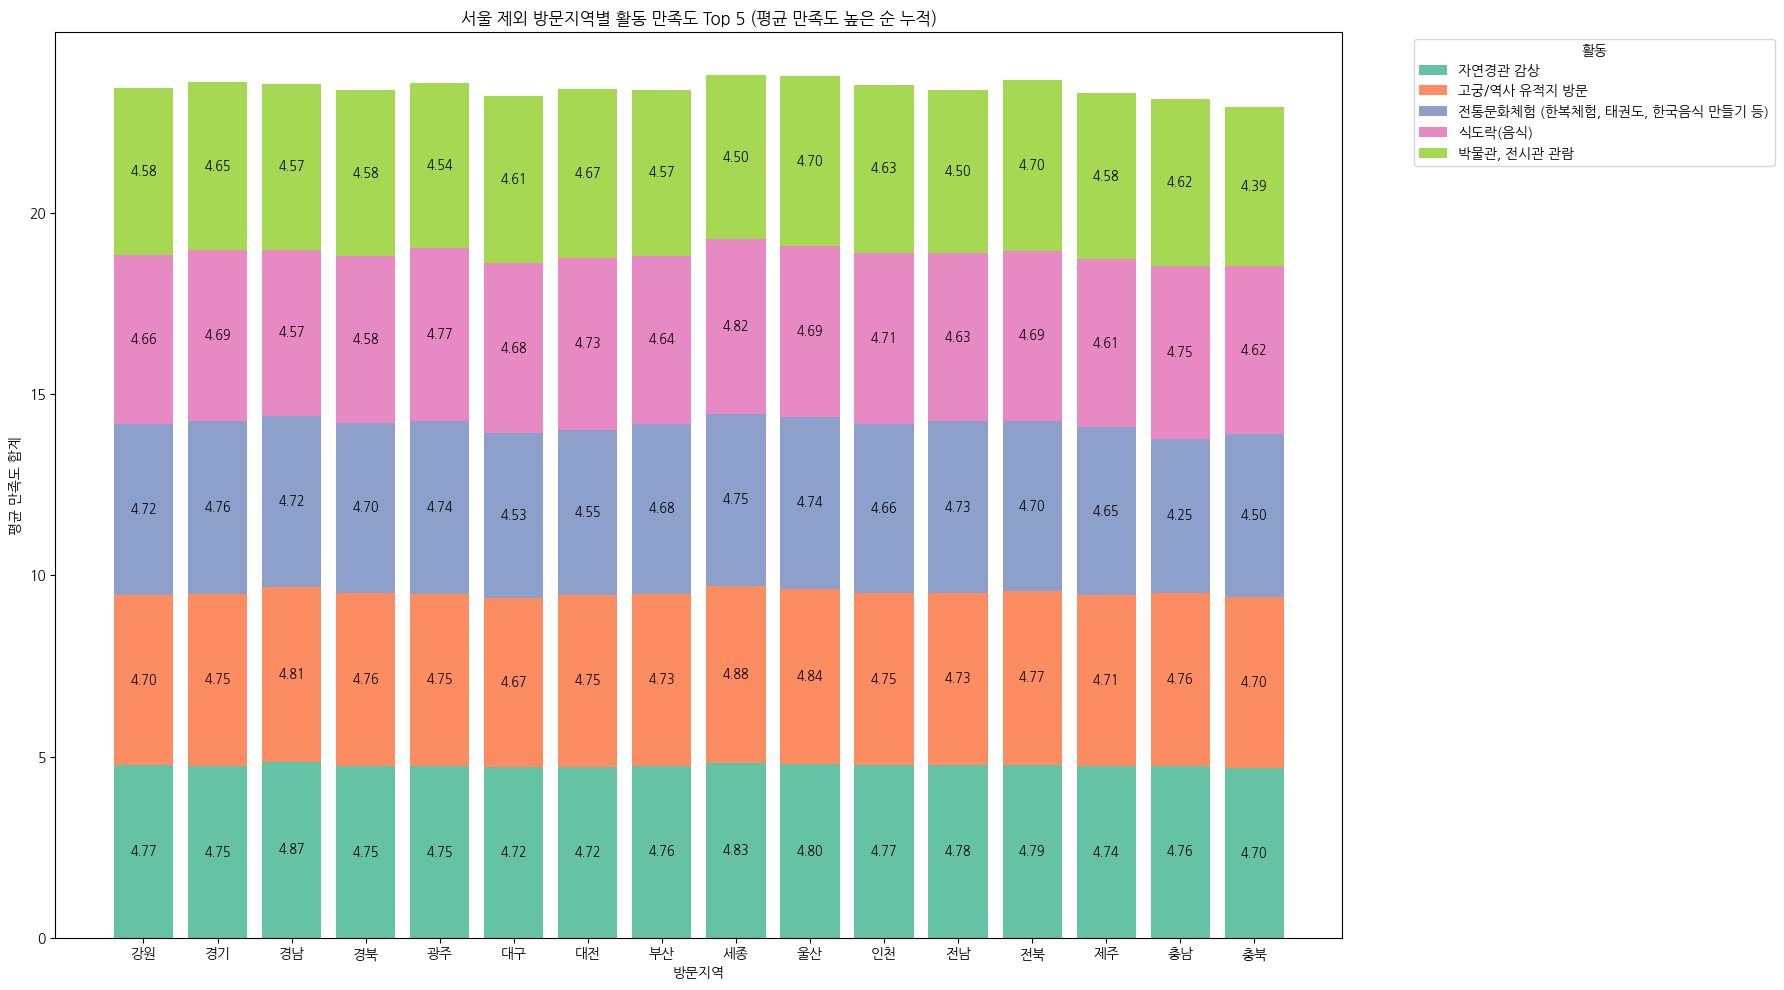

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# 1. 전처리 함수 정의
def preprocess_for_top5_plot(df):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 활동, 점수 in 활동만족도.items():
                    records.append({"방문지역": 지역, "활동": 활동, "만족도": 점수})
        except:
            continue
    return pd.DataFrame(records)

# 2. 데이터 전처리
df_plot_2023 = preprocess_for_top5_plot(df_cluster1_2023)

# 3. 전체 활동 중 평균 만족도 Top 5 추출
top5_activities_2023 = (
    df_plot_2023.groupby("활동")["만족도"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# 4. 필터링 및 정렬
df_top5_2023 = df_plot_2023[df_plot_2023["활동"].isin(top5_activities_2023.index)]
pivot_df_2023 = df_top5_2023.pivot_table(index="방문지역", columns="활동", values="만족도", aggfunc="mean").fillna(0)
pivot_df_2023 = pivot_df_2023[top5_activities_2023.index]  # 평균 만족도 높은 순서로 정렬


# 누적 막대 순서: 만족도 평균 높은 순
activity_order_2023 = top5_activities_2023.index.tolist()

# 색상 매핑 (원하는 색으로 커스터마이즈 가능)
colors = plt.get_cmap("Set2").colors[:len(activity_order_2023)]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(18, 10))

bottom = pd.Series([0]*len(pivot_df_2023), index=pivot_df_2023.index)

for i, activity in enumerate(activity_order_2023):
    values = pivot_df_2023[activity]
    bars = ax.bar(pivot_df_2023.index, values, bottom=bottom, label=activity, color=colors[i])

    # 각 바에 수치 기입
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=9
            )

    bottom += values  # 다음 활동은 누적값 기준으로 쌓음

# 그래프 설정
plt.title("서울 제외 방문지역별 활동 만족도 Top 5 (평균 만족도 높은 순 누적)")
plt.ylabel("평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
top5_activities_2023

,만족도
활동,
자연경관 감상,4.757585
고궁/역사 유적지 방문,4.737631
"전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",4.683075
식도락(음식),4.659031
"박물관, 전시관 관람",4.595552


## **A-2. 2023 지역별 활동만족도 (가중평균적용 + 동일 세팅)**

/tmp/ipython-input-19-3242738375.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))


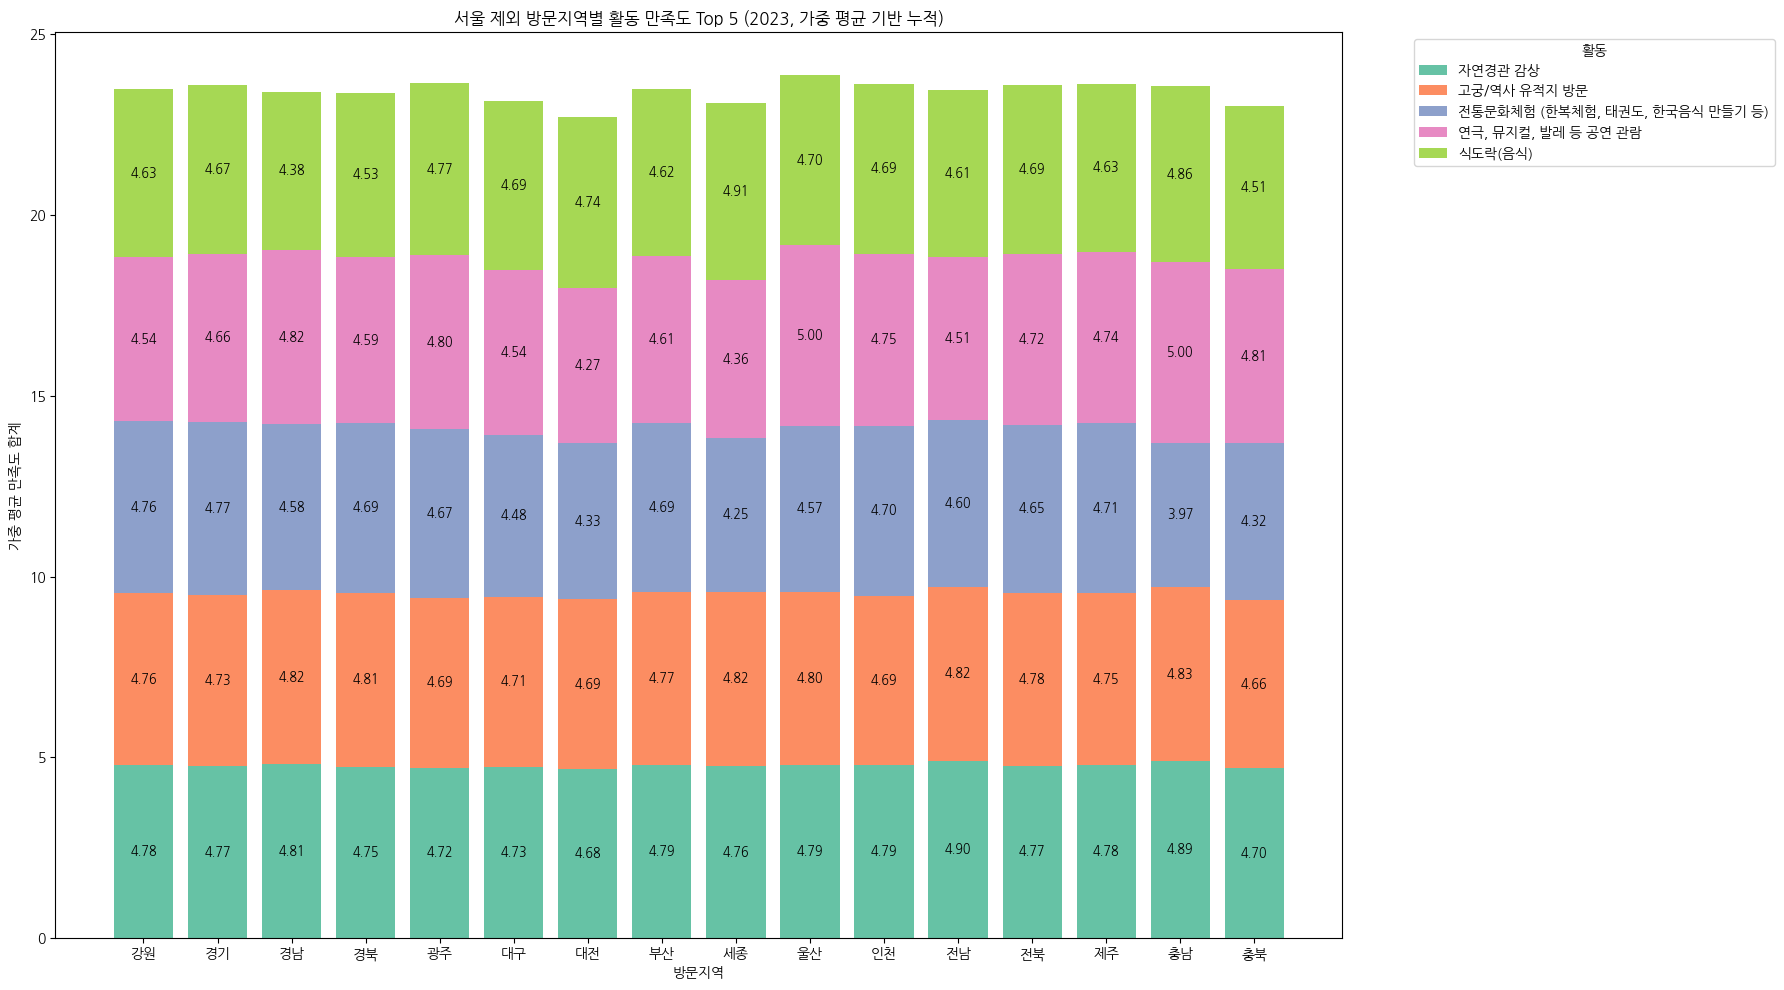

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# 1. 전처리 함수 정의 (가중치 포함) - ✅ 수정
def preprocess_for_top5_plot(df):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            가중치 = row.get("weight")  # ✅ 전체 가중치
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list) or pd.isna(가중치):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 활동, 점수 in 활동만족도.items():
                    records.append({
                        "방문지역": 지역,
                        "활동": 활동,
                        "만족도": 점수,
                        "가중치": 가중치  # ✅ 추가
                    })
        except:
            continue
    return pd.DataFrame(records)

# 2. 데이터 전처리
df_plot_2023 = preprocess_for_top5_plot(df_cluster1_2023)

# 3. 전체 활동 중 **가중 평균** 기준 Top 5 추출 - ✅ 수정
top5_activities_2023 = (
    df_plot_2023.groupby("활동")
    .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))
    .sort_values(ascending=False)
    .head(5)
)

# 4. Top5 필터링 및 피벗 (가중 평균 사용) - ✅ 수정
df_top5_2023 = df_plot_2023[df_plot_2023["활동"].isin(top5_activities_2023.index)]
pivot_df_2023 = df_top5_2023.pivot_table(
    index="방문지역",
    columns="활동",
    values="만족도",
    aggfunc=lambda x: np.average(x, weights=df_top5_2023.loc[x.index, "가중치"])
).fillna(0)

# 순서 정렬
pivot_df_2023 = pivot_df_2023[top5_activities_2023.index]

# 누적 막대 순서
activity_order_2023 = top5_activities_2023.index.tolist()
colors = plt.get_cmap("Set2").colors[:len(activity_order_2023)]

# 5. 시각화
fig, ax = plt.subplots(figsize=(18, 10))
bottom = pd.Series([0]*len(pivot_df_2023), index=pivot_df_2023.index)

for i, activity in enumerate(activity_order_2023):
    values = pivot_df_2023[activity]
    bars = ax.bar(pivot_df_2023.index, values, bottom=bottom, label=activity, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",  # ✅ 소수점 두 자리
                ha='center', va='center', fontsize=9
            )
    bottom += values

plt.title("서울 제외 방문지역별 활동 만족도 Top 5 (2023, 가중 평균 기반 누적)")
plt.ylabel("가중 평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
top5_activities_2023

,0
활동,
자연경관 감상,4.778001
고궁/역사 유적지 방문,4.753058
"전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",4.681308
"연극, 뮤지컬, 발레 등 공연 관람",4.642798
식도락(음식),4.640894


### **도출!**

[2023년]

**1. 자연경관 감상**
  - 전남 : 4.90

**2. 고궁/역사 유적지 방문**
  - 충남 : 4.83

**3. 전통문화체험**
  - 경기 : 4.77

**4. 공연 관람**
  - 울산, 충남 : 5.00

**5. 식도락**
  - 세종 : 4.91


## **B-1. 2024 지역별 활동만족도 (평균 만족도 TOP5, 서울 제외)**

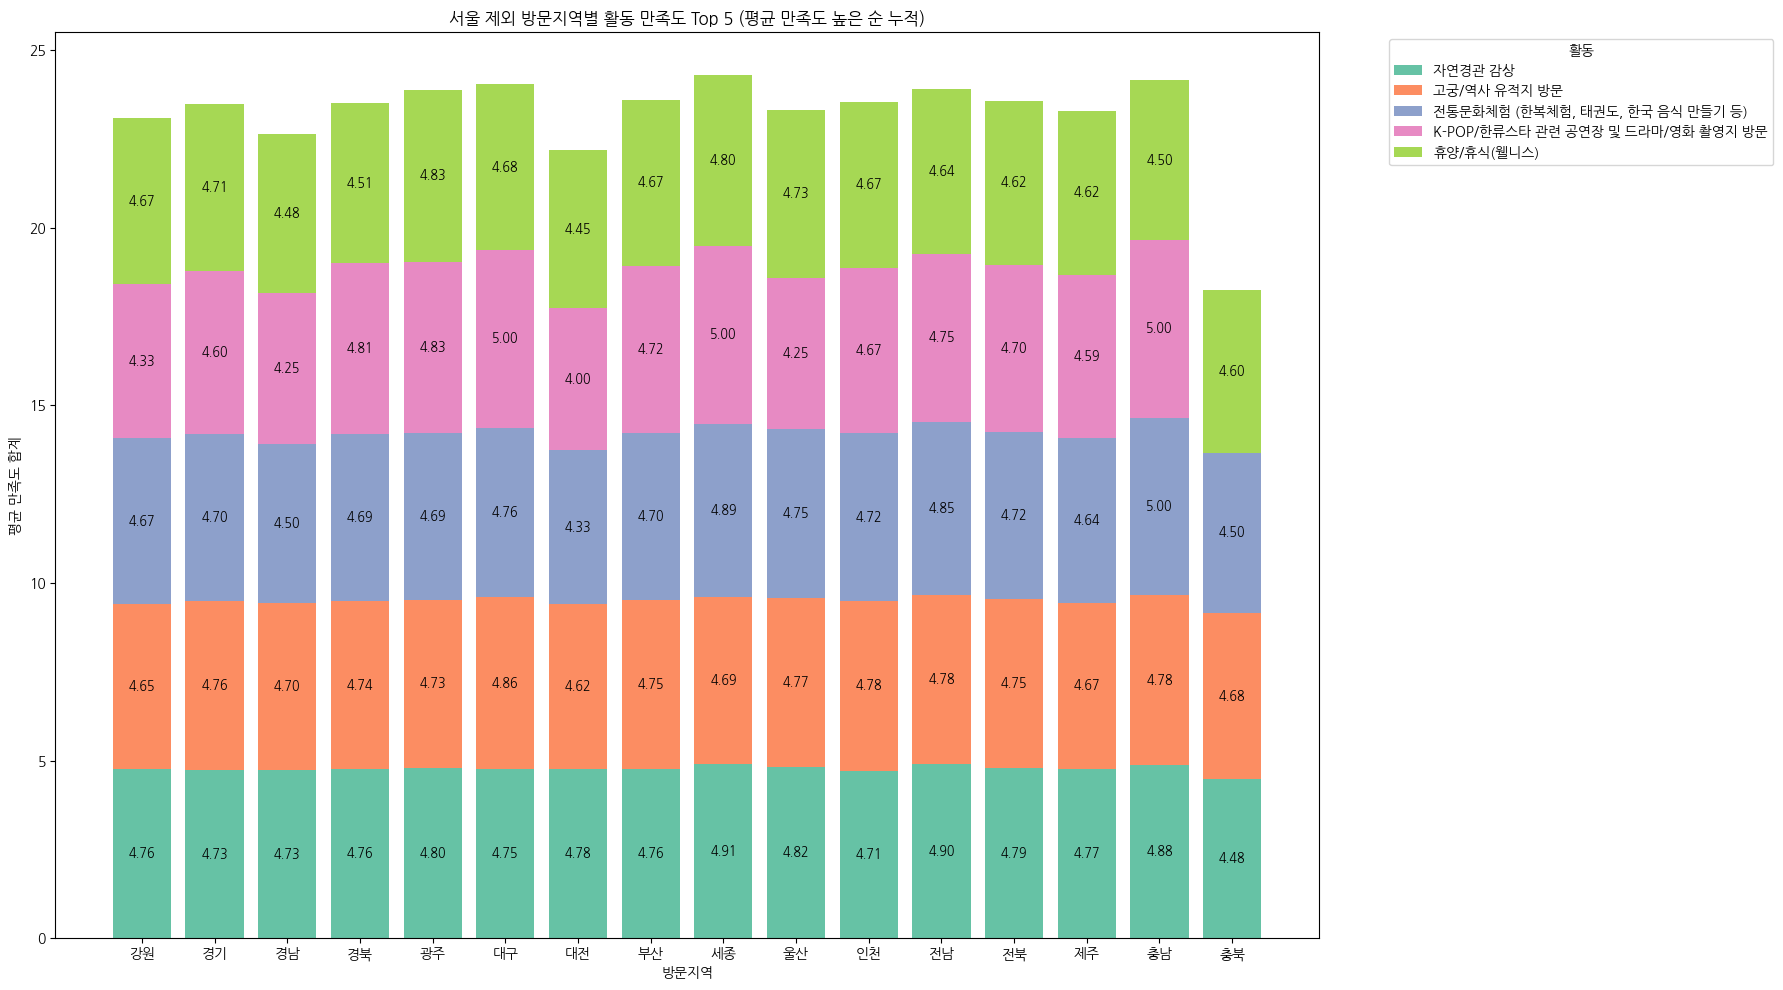

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# 1. 전처리 함수 정의
def preprocess_for_top5_plot(df):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 활동, 점수 in 활동만족도.items():
                    records.append({"방문지역": 지역, "활동": 활동, "만족도": 점수})
        except:
            continue
    return pd.DataFrame(records)

# 2. 데이터 전처리
df_plot_2024 = preprocess_for_top5_plot(df_cluster1_2024)

# 3. 전체 활동 중 평균 만족도 Top 5 추출
top5_activities_2024 = (
    df_plot_2024.groupby("활동")["만족도"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# 4. 필터링 및 정렬
df_top5_2024 = df_plot_2024[df_plot_2024["활동"].isin(top5_activities_2024.index)]
pivot_df_2024 = df_top5_2024.pivot_table(index="방문지역", columns="활동", values="만족도", aggfunc="mean").fillna(0)
pivot_df_2024 = pivot_df_2024[top5_activities_2024.index]  # 평균 만족도 높은 순서로 정렬


# 누적 막대 순서: 만족도 평균 높은 순
activity_order_2024 = top5_activities_2024.index.tolist()

# 색상 매핑 (원하는 색으로 커스터마이즈 가능)
colors = plt.get_cmap("Set2").colors[:len(activity_order_2024)]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(18, 10))

bottom = pd.Series([0]*len(pivot_df_2024), index=pivot_df_2024.index)

for i, activity in enumerate(activity_order_2024):
    values = pivot_df_2024[activity]
    bars = ax.bar(pivot_df_2024.index, values, bottom=bottom, label=activity, color=colors[i])

    # 각 바에 수치 기입
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=9
            )

    bottom += values  # 다음 활동은 누적값 기준으로 쌓음

# 그래프 설정
plt.title("서울 제외 방문지역별 활동 만족도 Top 5 (평균 만족도 높은 순 누적)")
plt.ylabel("평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [23]:
top5_activities_2024

,만족도
활동,
자연경관 감상,4.759428
고궁/역사 유적지 방문,4.735944
"전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",4.691539
K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문,4.664653
휴양/휴식(웰니스),4.651495


## **B-2. 2024 지역별 활동만족도 (가중평균적용 + 동일 세팅)**

/tmp/ipython-input-24-2325540841.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))


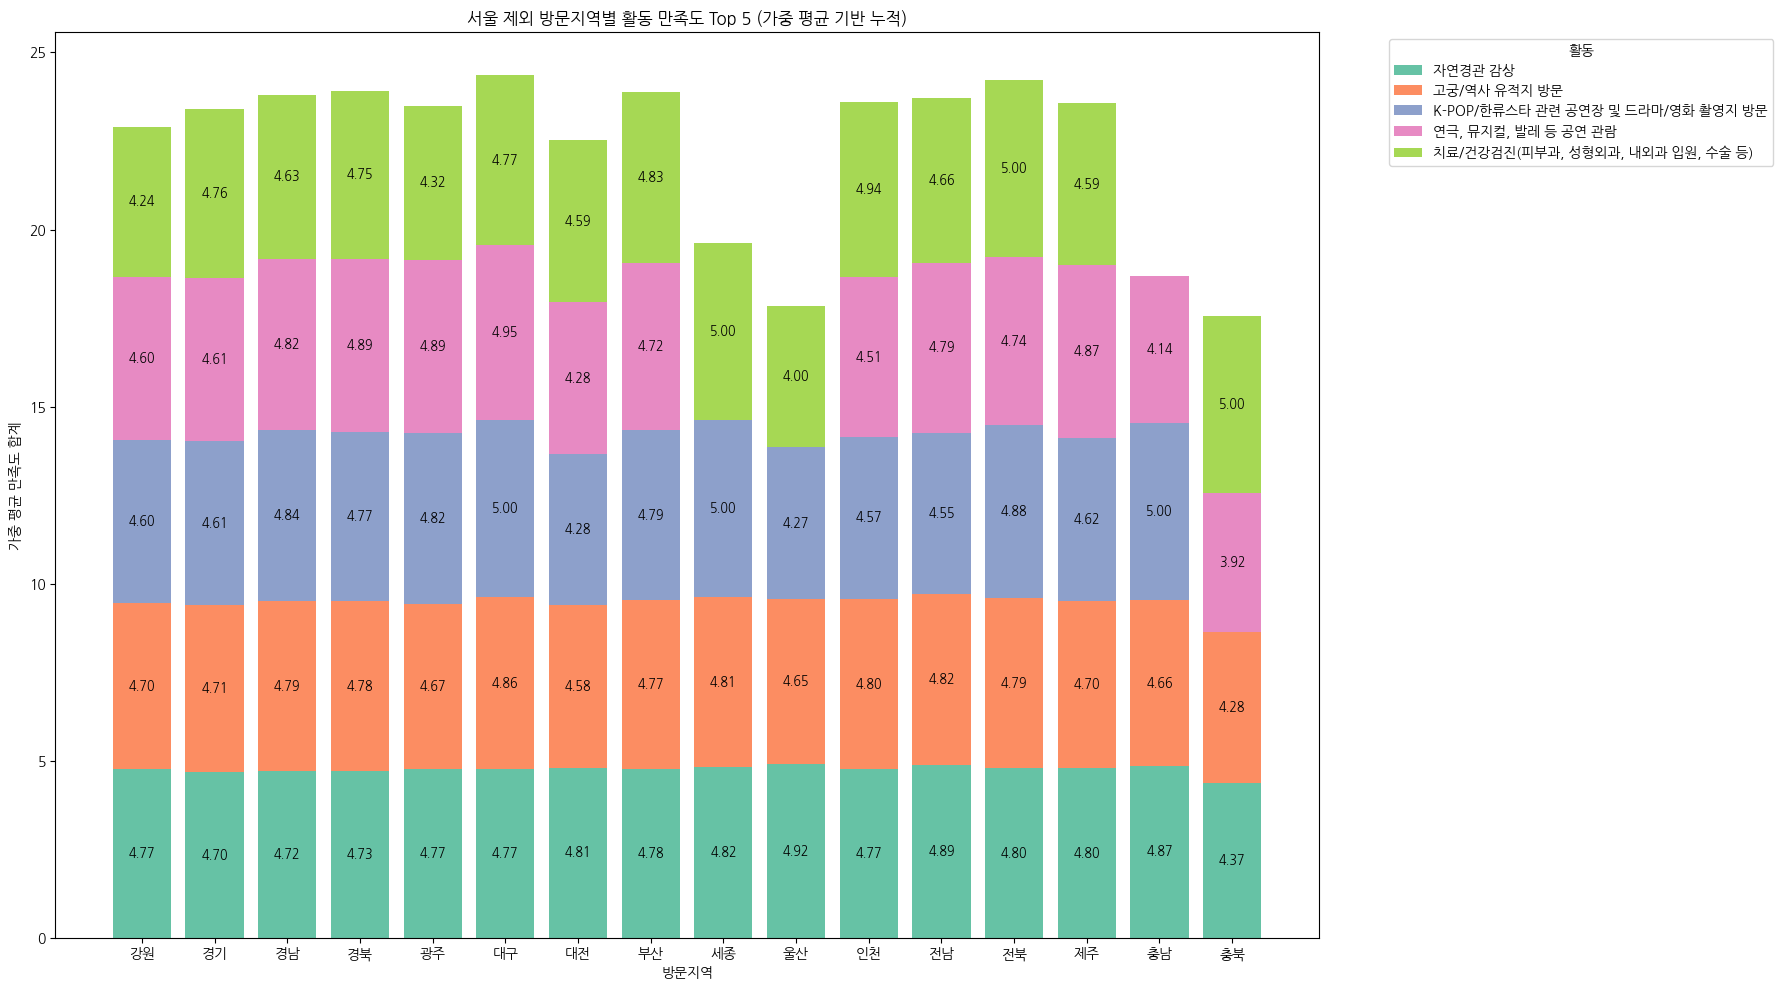

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# 1. 전처리 함수 정의 (2024 기준, 가중치 포함) - ✅ 수정
def preprocess_for_top5_plot(df):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            가중치 = row.get("weight")  # ✅ 전체 가중치 변수명 사용
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list) or pd.isna(가중치):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 활동, 점수 in 활동만족도.items():
                    records.append({
                        "방문지역": 지역,
                        "활동": 활동,
                        "만족도": 점수,
                        "가중치": 가중치  # ✅ 가중치 포함
                    })
        except:
            continue
    return pd.DataFrame(records)

# 2. 데이터 전처리
df_plot_2024 = preprocess_for_top5_plot(df_cluster1_2024)

# 3. 전체 활동 중 **가중 평균** 기준 Top 5 추출 - ✅ 수정
top5_activities_2024 = (
    df_plot_2024.groupby("활동")
    .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))
    .sort_values(ascending=False)
    .head(5)
)

# 4. Top5 필터링 및 피벗
df_top5_2024 = df_plot_2024[df_plot_2024["활동"].isin(top5_activities_2024.index)]
pivot_df_2024 = df_top5_2024.pivot_table(
    index="방문지역",
    columns="활동",
    values="만족도",
    aggfunc=lambda x: np.average(x, weights=df_top5_2024.loc[x.index, "가중치"])  # ✅ 가중 평균
).fillna(0)

# 순서 정렬
pivot_df_2024 = pivot_df_2024[top5_activities_2024.index]

# 색상 매핑
activity_order = top5_activities_2024.index.tolist()
colors = plt.get_cmap("Set2").colors[:len(activity_order)]

# 5. 그래프 시각화
fig, ax = plt.subplots(figsize=(18, 10))
bottom = pd.Series([0]*len(pivot_df_2024), index=pivot_df_2024.index)

for i, activity in enumerate(activity_order):
    values = pivot_df_2024[activity]
    bars = ax.bar(pivot_df_2024.index, values, bottom=bottom, label=activity, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",  # 소수점 두 자리
                ha='center', va='center', fontsize=9
            )
    bottom += values

plt.title("서울 제외 방문지역별 활동 만족도 Top 5 (가중 평균 기반 누적)")
plt.ylabel("가중 평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [25]:
top5_activities_2024

,0
활동,
자연경관 감상,4.765818
고궁/역사 유적지 방문,4.744748
K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문,4.729864
"연극, 뮤지컬, 발레 등 공연 관람",4.709680
"치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",4.704168


### **도출!**

[2024년]

**1. 자연경관 감상**
  - 울산 : 4.92

**2. 고궁/역사 유적지 방문**
  - 대구 : 4.86

**3. K-컨텐츠**
  - 충남 : 5.00

**4. K-컨텐츠**
  - 경북, 광주 :

**5. 휴양/휴식**
  - 광주 : 4.83


## **C. 2023+2024 지역별 활동만족도 TOP 5(가중평균적용)**

/tmp/ipython-input-26-2810079242.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))


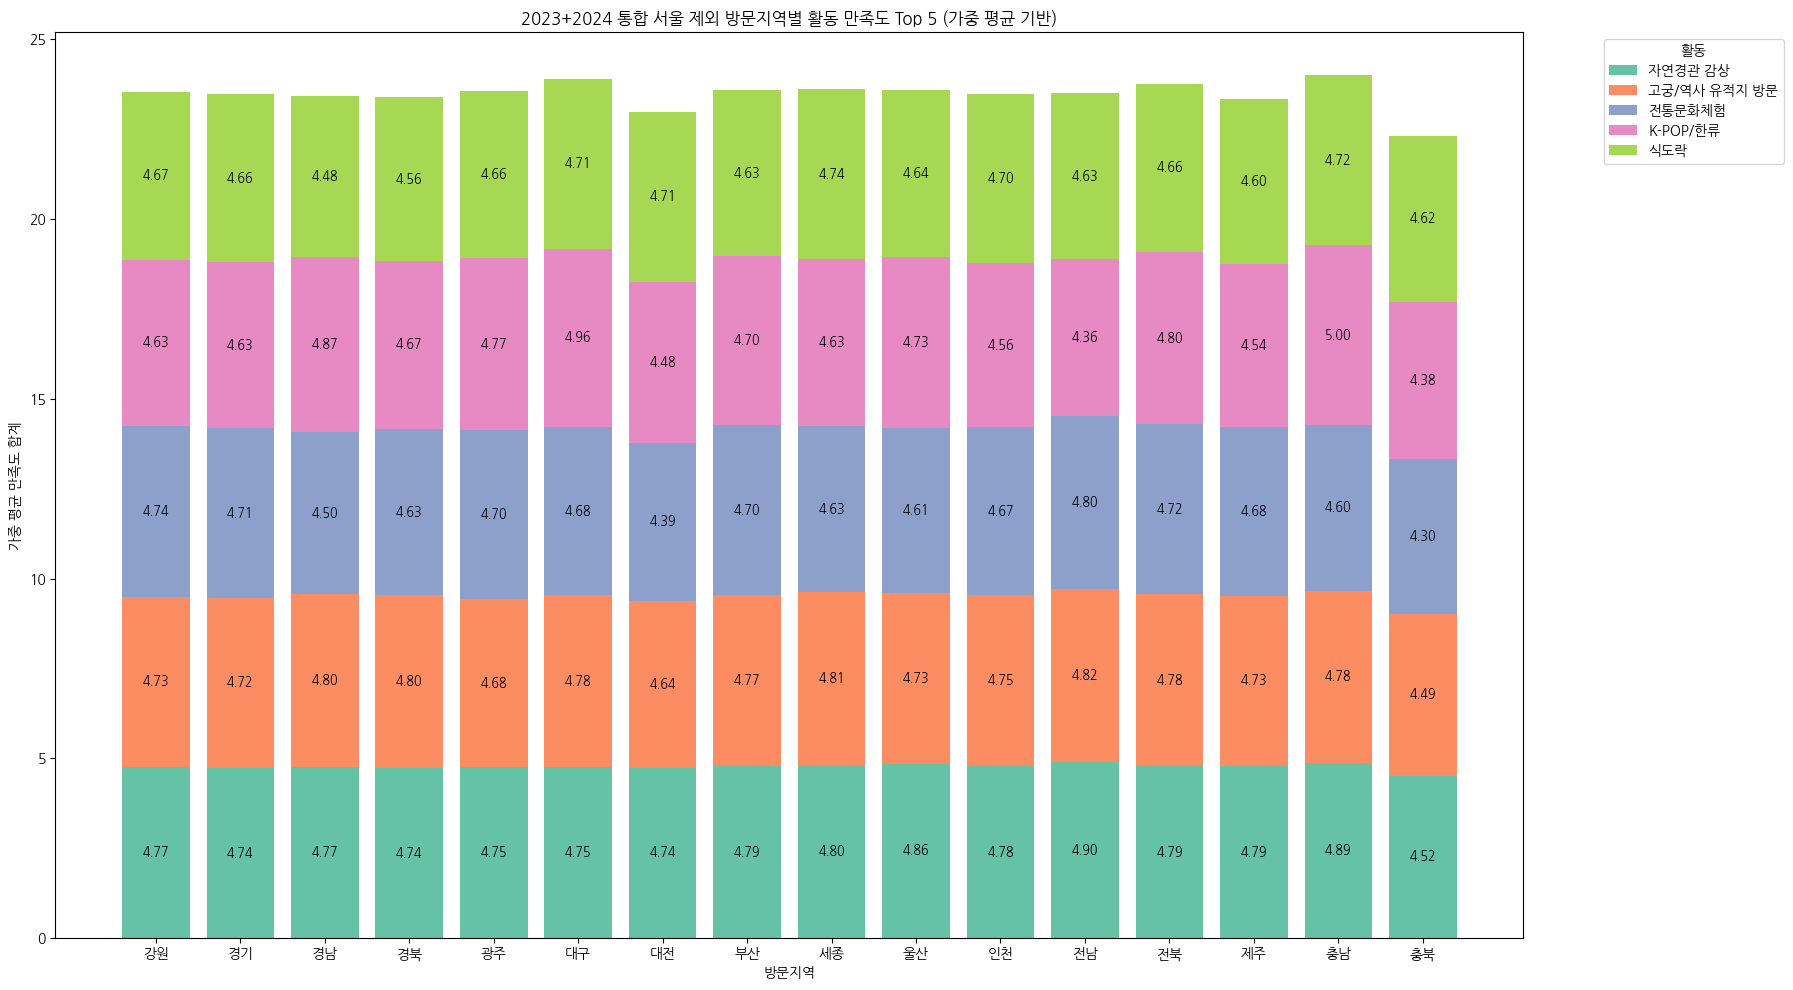

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# 1. 활동명 매핑 통합 (2023 ↔ 2024 공통항목만 남기기)
# key: 2023 기준명, value: 통합명
common_activity_mapping = {
    "식도락(음식)": "식도락",
    "식도락(음식/미식) 관광": "식도락",
    "쇼핑": "쇼핑",
    "자연경관 감상": "자연경관 감상",
    "고궁/역사 유적지 방문": "고궁/역사 유적지 방문",
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)": "전통문화체험",
    "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)": "전통문화체험",
    "박물관, 전시관 관람": "박물관 관람",
    "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문": "K-POP/한류",
}

# 2. 전처리 함수 (2023/2024 공통)
def preprocess_for_combined_plot(df, year_label):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            가중치 = row.get("weight")
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list) or pd.isna(가중치):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 원래명, 점수 in 활동만족도.items():
                    통합명 = common_activity_mapping.get(원래명)
                    if 통합명:
                        records.append({
                            "방문지역": 지역,
                            "활동": 통합명,
                            "만족도": 점수,
                            "가중치": 가중치,
                            "연도": year_label
                        })
        except:
            continue
    return pd.DataFrame(records)

# 3. 데이터 병합
df_2023_clean = preprocess_for_combined_plot(df_cluster1_2023, "2023")
df_2024_clean = preprocess_for_combined_plot(df_cluster1_2024, "2024")
df_combined = pd.concat([df_2023_clean, df_2024_clean], ignore_index=True)

# 4. 통합 기준으로 활동 Top 5 추출 (가중 평균 기준)
top5_activities = (
    df_combined.groupby("활동")
    .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))
    .sort_values(ascending=False)
    .head(5)
)

# 5. Top 5 기준으로 피벗 테이블 만들기
df_top5 = df_combined[df_combined["활동"].isin(top5_activities.index)]

pivot_df = df_top5.pivot_table(
    index="방문지역",
    columns="활동",
    values="만족도",
    aggfunc=lambda x: np.average(x, weights=df_top5.loc[x.index, "가중치"])
).fillna(0)

# 순서 정렬
pivot_df = pivot_df[top5_activities.index]

# 시각화
activity_order = top5_activities.index.tolist()
colors = plt.get_cmap("Set2").colors[:len(activity_order)]

fig, ax = plt.subplots(figsize=(18, 10))
bottom = pd.Series([0]*len(pivot_df), index=pivot_df.index)

for i, activity in enumerate(activity_order):
    values = pivot_df[activity]
    bars = ax.bar(pivot_df.index, values, bottom=bottom, label=activity, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=9
            )
    bottom += values

plt.title("2023+2024 통합 서울 제외 방문지역별 활동 만족도 Top 5 (가중 평균 기반)")
plt.ylabel("가중 평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
top5_activities

,0
활동,
자연경관 감상,4.771882
고궁/역사 유적지 방문,4.748871
전통문화체험,4.683816
K-POP/한류,4.672632
식도락,4.641829


### **도출!**

[통합]

**1. 자연경관 감상**
  - 전남 : 4.90

**2. 고궁/역사 유적지 방문**
  - 전남 : 4.82
  - 세종 : 4.81

**3. 전통문화체험**
  - 전남 : 4.80
  - 강원 : 4.74

**4. K-컨텐츠**
  - 충남 : 5.00

**5. 식도락**
  - 세종 : 4.74


## **D. 2023+2024 지역별 활동만족도 TOP 7 (가중평균적용 + 동일 세팅)**

/tmp/ipython-input-28-395761981.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))


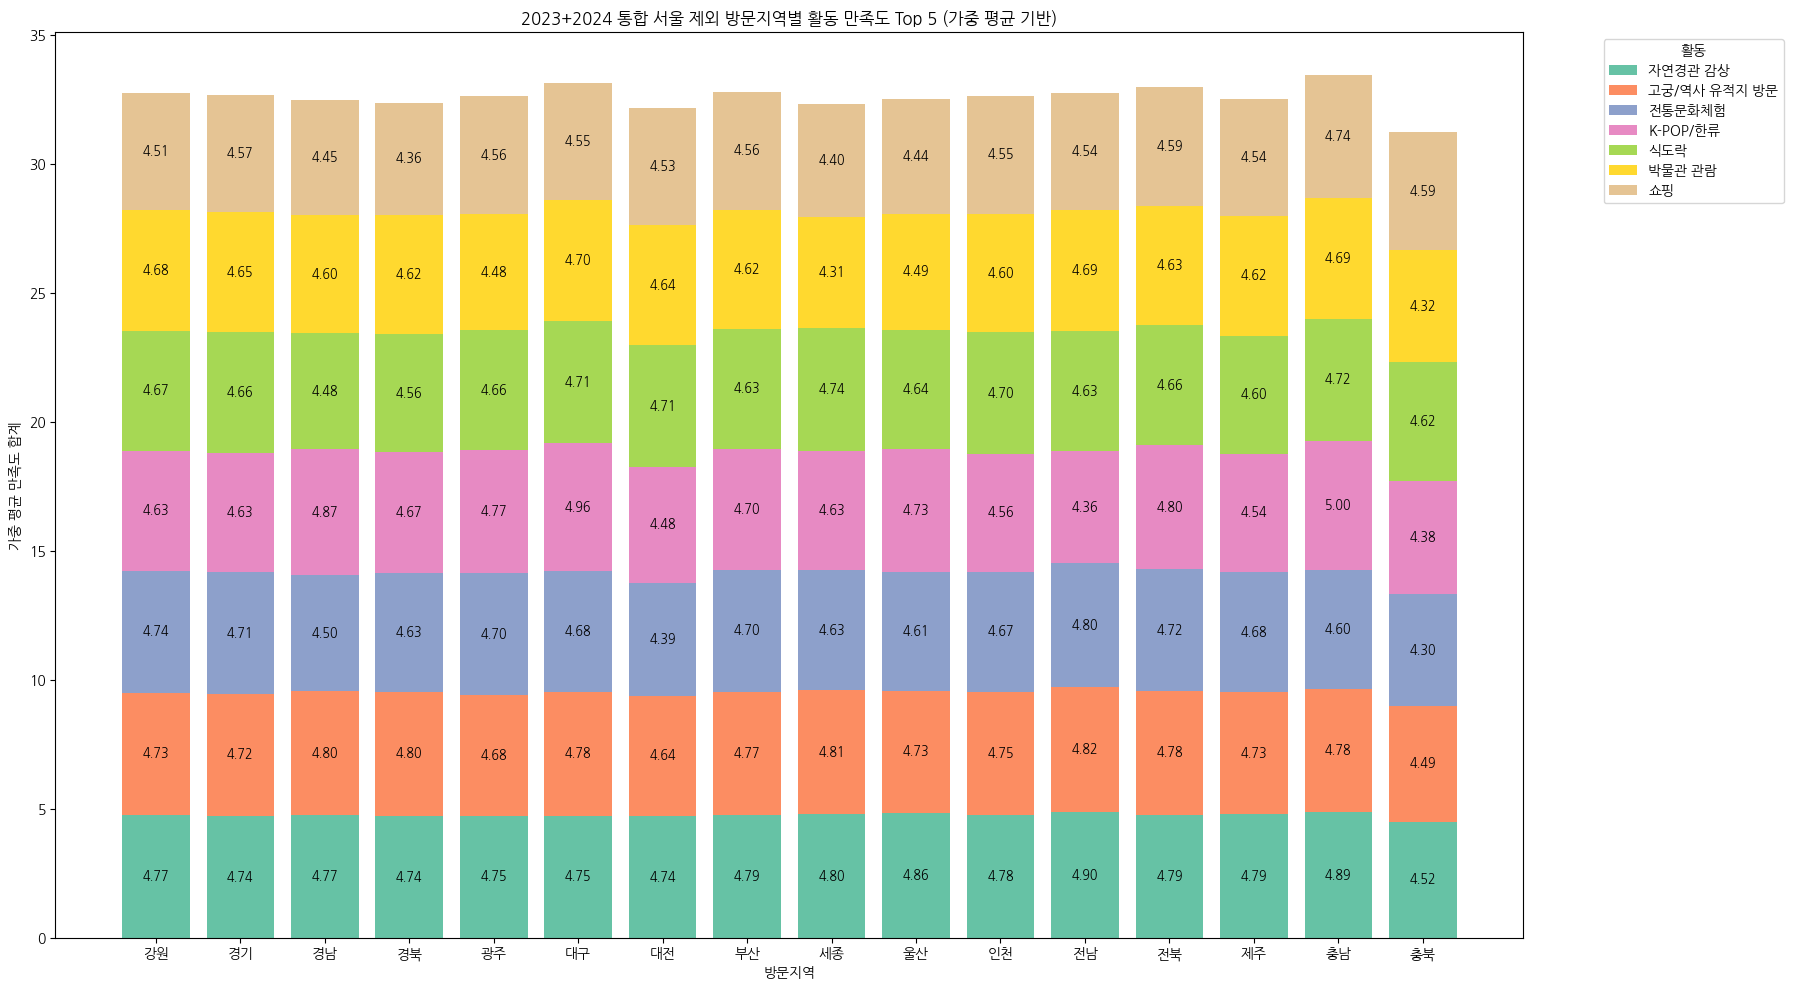

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# 1. 활동명 매핑 통합 (2023 ↔ 2024 공통항목만 남기기)
# key: 2023 기준명, value: 통합명
common_activity_mapping = {
    "식도락(음식)": "식도락",
    "식도락(음식/미식) 관광": "식도락",
    "쇼핑": "쇼핑",
    "자연경관 감상": "자연경관 감상",
    "고궁/역사 유적지 방문": "고궁/역사 유적지 방문",
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)": "전통문화체험",
    "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)": "전통문화체험",
    "박물관, 전시관 관람": "박물관 관람",
    "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문": "K-POP/한류",
}

# 2. 전처리 함수 (2023/2024 공통)
def preprocess_for_combined_plot(df, year_label):
    records = []
    for _, row in df.iterrows():
        try:
            방문지역들 = ast.literal_eval(row["방문지역"]) if isinstance(row["방문지역"], str) else row["방문지역"]
            활동만족도 = row["활동만족도"]
            가중치 = row.get("weight")
            if not isinstance(활동만족도, dict) or not isinstance(방문지역들, list) or pd.isna(가중치):
                continue
            for 지역 in 방문지역들:
                if 지역 == "서울":
                    continue
                for 원래명, 점수 in 활동만족도.items():
                    통합명 = common_activity_mapping.get(원래명)
                    if 통합명:
                        records.append({
                            "방문지역": 지역,
                            "활동": 통합명,
                            "만족도": 점수,
                            "가중치": 가중치,
                            "연도": year_label
                        })
        except:
            continue
    return pd.DataFrame(records)

# 3. 데이터 병합
df_2023_clean = preprocess_for_combined_plot(df_cluster1_2023, "2023")
df_2024_clean = preprocess_for_combined_plot(df_cluster1_2024, "2024")
df_combined = pd.concat([df_2023_clean, df_2024_clean], ignore_index=True)

# 4. 통합 기준으로 활동 Top 5 추출 (가중 평균 기준)
top10_activities = (
    df_combined.groupby("활동")
    .apply(lambda g: np.average(g["만족도"], weights=g["가중치"]))
    .sort_values(ascending=False)
    .head(10)
)

# 5. Top 5 기준으로 피벗 테이블 만들기
df_top10 = df_combined[df_combined["활동"].isin(top10_activities.index)]

pivot10_df = df_top10.pivot_table(
    index="방문지역",
    columns="활동",
    values="만족도",
    aggfunc=lambda x: np.average(x, weights=df_top10.loc[x.index, "가중치"])
).fillna(0)

# 순서 정렬
pivot10_df = pivot10_df[top10_activities.index]

# 시각화
activity10_order = top10_activities.index.tolist()
colors = plt.get_cmap("Set2").colors[:len(activity10_order)]

fig, ax = plt.subplots(figsize=(18, 10))
bottom = pd.Series([0]*len(pivot10_df), index=pivot10_df.index)

for i, activity in enumerate(activity10_order):
    values = pivot10_df[activity]
    bars = ax.bar(pivot10_df.index, values, bottom=bottom, label=activity, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=9
            )
    bottom += values

plt.title("2023+2024 통합 서울 제외 방문지역별 활동 만족도 Top 5 (가중 평균 기반)")
plt.ylabel("가중 평균 만족도 합계")
plt.xlabel("방문지역")
plt.xticks(rotation=0)
plt.legend(title="활동", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
top10_activities

,0
활동,
자연경관 감상,4.771882
고궁/역사 유적지 방문,4.748871
전통문화체험,4.683816
K-POP/한류,4.672632
식도락,4.641829
박물관 관람,4.624571
쇼핑,4.538470


### **도출!**

[통합]

**1. 자연경관 감상**
  - 전남 : 4.90

**2. 고궁/역사 유적지 방문**
  - 전남 : 4.82
  - 세종 : 4.81

**3. 전통문화체험**
  - 전남 : 4.80
  - 강원 : 4.74

**4. K-컨텐츠**
  - 충남 : 5.00

**5. 식도락**
  - 세종 : 4.74

**6. 박물관 관람**
  - 대구 : 4.70

## **자연경관 감상 1등 전남 → 전남의 어느 도시가 제일 만족스러웠는지**
- 하지만, 자연경관 감상에 만족했는가는 포함되어 있지 않음!!

## **전남1. 전남 방문자 + 만족 지역 전남 데이터셋 (활동 관련X)**

In [31]:
# 만족지역에 '전남' 또는 '전라남도'가 포함된 응답자
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
def contains_전남(row):
    return any(isinstance(val, str) and ('전남' in val or '전라남도' in val) for val in row)

전남포함_mask = df_all[satisfied_cols].apply(contains_전남, axis=1)

# 전남에 방문한 사람 (Q9_2a16 == '전남')
전남활동_mask = df_all['Q9_2a16'] == '전남'

# 두 조건 모두 만족하는 최종 필터
최종_mask = 전남포함_mask & 전남활동_mask
filtered_df = df_all.loc[최종_mask, ['pnid', 'Q9_2a16'] + satisfied_cols]

# 결과 확인
print(f"🎯 조건을 모두 만족하는 응답자 수: {len(filtered_df)}")
display(filtered_df.head(10))


🎯 조건을 모두 만족하는 응답자 수: 145


,pnid,Q9_2a16,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5
441,807,전남,전라남도-목포,NaN,NaN,NaN,NaN
968,1668,전남,전라남도-여수,NaN,NaN,NaN,NaN
1094,1837,전남,전라남도-고흥,NaN,NaN,NaN,NaN
1345,2216,전남,전라남도-신안 퍼플섬(박지도),NaN,NaN,NaN,NaN
1464,2419,전남,전라남도-여수,NaN,NaN,NaN,NaN
1702,2701,전남,전라남도-목포,NaN,NaN,NaN,NaN
1703,2703,전남,전라남도-목포,NaN,NaN,NaN,NaN
2309,3460,전남,전라남도-여수,NaN,NaN,NaN,NaN
2371,3538,전남,전라남도-여수,NaN,NaN,NaN,NaN
2622,3856,전남,전라남도-여수,NaN,NaN,NaN,NaN


## **전남2. 전남 방문객 + 만족 지역 전남인지 아닌지**

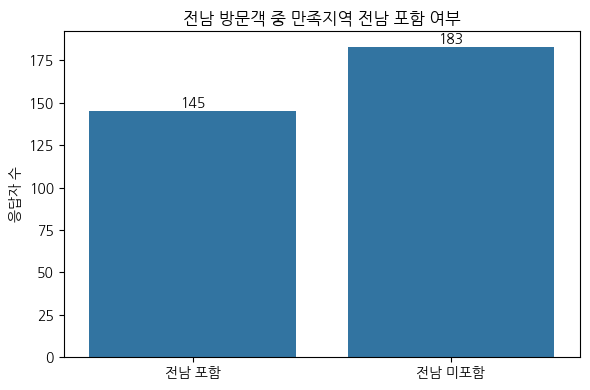

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # 한글 폰트 적용

# 전남 방문객 수
total_전남_활동자 = (df_all['Q9_2a16'] == '전남').sum()

# 만족지역에 전남 포함된 사람 수
matched = filtered_df.shape[0]

# 데이터 준비
labels = ['전남 포함', '전남 미포함']
values = [matched, total_전남_활동자 - matched]

# 시각화
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=values)

# 제목/축 설정
plt.title("전남 방문객 중 만족지역 전남 포함 여부")
plt.ylabel("응답자 수")

# 수치 표시
for i, value in enumerate(values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


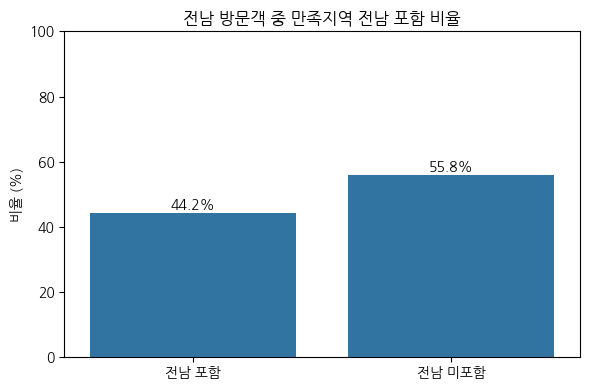

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 전체 및 포함된 수
total_전남_활동자 = (df_all['Q9_2a16'] == '전남').sum()
matched = filtered_df.shape[0]
unmatched = total_전남_활동자 - matched

# 2. 비율 계산
matched_pct = round((matched / total_전남_활동자) * 100, 1)
unmatched_pct = round((unmatched / total_전남_활동자) * 100, 1)

labels = ['전남 포함', '전남 미포함']
values = [matched_pct, unmatched_pct]

# 3. 시각화
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=values)

# 4. 타이틀 및 축 설정
plt.title("전남 방문객 중 만족지역 전남 포함 비율")
plt.ylabel("비율 (%)")

# 5. 막대 위에 퍼센트 수치 표시
for i, value in enumerate(values):
    ax.text(i, value + 0.5, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)  # 퍼센트 기준 스케일 고정
plt.tight_layout()
plt.show()


## **전남3. 전남 방문객 + 만족 지역 전남 (관광지 포함)**

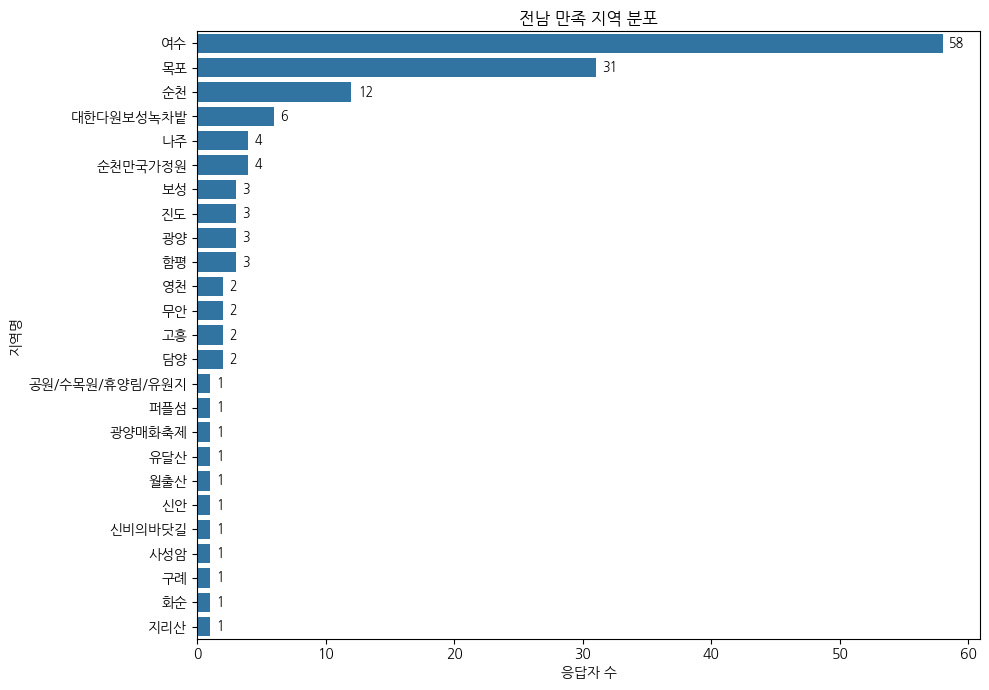

In [36]:
import re

def normalize_region_name(name):
    if not isinstance(name, str):
        return None

    # 1. 괄호 제거, 밑줄/공백 → 하이픈으로 통일
    name = re.sub(r'\(.*?\)', '', name)
    name = name.replace('_', '-').replace(' ', '-')

    # 2. 하이픈으로 분리
    parts = name.split('-')

    # 3. '전라남도', '전남' 제외하고, 끝에 '군'으로 끝나면 제거
    parts = [p for p in parts if p not in ['전라남도', '전남']]
    if parts and parts[-1].endswith('군'):
        parts[-1] = parts[-1].replace('군', '')  # 군 제거

    # 4. 마지막 의미 있는 지역명 반환
    return parts[-1].strip() if parts else name

# 1. 전남 관련 만족 지역 컬럼만 추출
전남_지역_리스트 = filtered_df[satisfied_cols].values.ravel()

# 2. NaN 제거 + '전남' 관련 지역만 필터
전남_관련_지역 = [x for x in 전남_지역_리스트 if isinstance(x, str) and ('전남' in x or '전라남도' in x)]


전남_지역_series = pd.Series(전남_관련_지역)
지역별_빈도 = 전남_지역_series.value_counts().sort_values(ascending=False)

# 정규화 적용
전남_지역_series_norm = 전남_지역_series.map(normalize_region_name)

# 그룹핑
지역별_빈도_norm = 전남_지역_series_norm.value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=지역별_빈도_norm.values, y=지역별_빈도_norm.index)
plt.title("전남 만족 지역 분포")
plt.xlabel("응답자 수")
plt.ylabel("지역명")

# 수치 표시
for i, value in enumerate(지역별_빈도_norm.values):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **전남3-1. 전남 방문객 + 만족 지역 전남 (관광지를 지역에 편입)**




1. 대한다원보성녹차밭 = 보성
2. 순천만국가정원 = 순천
3. 퍼플섬 = 신안
4. 광양매화축제 = 광양
5. 유달산 = 목포
6. 월출산 = 영암
7. 신비의바닷길 = 진도
8. 사성암 = 구례

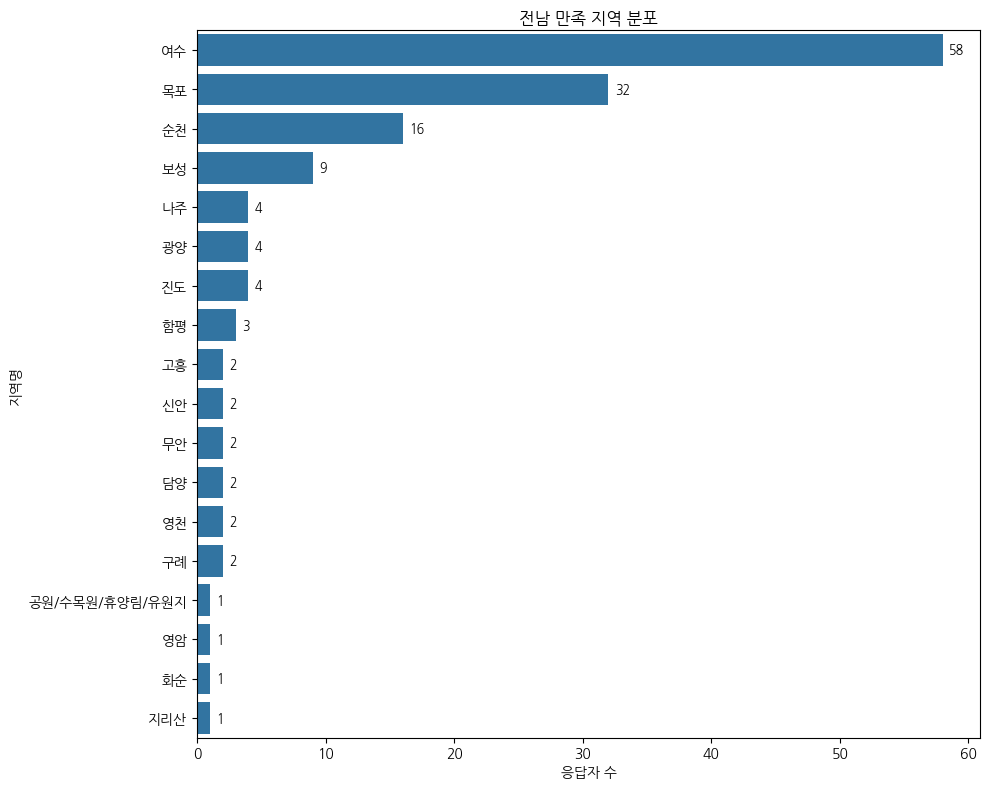

In [37]:
# 1. 사용자 정의 매핑 정리
custom_mapping = {
    '대한다원보성녹차밭': '보성',
    '순천만국가정원': '순천',
    '퍼플섬': '신안',
    '광양매화축제': '광양',
    '유달산': '목포',
    '월출산': '영암',
    '신비의바닷길': '진도',
    '사성암': '구례',
}

# 2. 지역 정규화 함수
import re

def normalize_region_name(name):
    if not isinstance(name, str):
        return None

    # 우선 괄호 제거, 밑줄 → 하이픈 통일
    name_cleaned = re.sub(r'\(.*?\)', '', name)
    name_cleaned = name_cleaned.replace('_', '-').replace(' ', '-')

    # 커스텀 키워드 매핑 우선 적용
    for keyword, std_name in custom_mapping.items():
        if keyword in name_cleaned:
            return std_name

    # '전라남도-지역이름' 또는 '전라남도-지역-군' → 군 제거
    parts = name_cleaned.split('-')
    parts = [p for p in parts if p and p not in ['전라남도', '전남']]

    # 군, 시, 구 등이 들어간 경우: 뒤에서 군 단어 제거
    if parts and parts[-1].endswith('군'):
        parts[-1] = parts[-1].replace('군', '')

    return parts[-1] if parts else name_cleaned


# 3. 적용 및 시각화
# 정제 적용
전남_지역_series_norm = 전남_지역_series.map(normalize_region_name)

# 1. 지역별 빈도 내림차순 정렬 (가장 많은 게 위로)
지역별_빈도_norm = 전남_지역_series_norm.value_counts().sort_values(ascending=False)

# 2. 시각화
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=지역별_빈도_norm.values,
    y=지역별_빈도_norm.index,
    order=지역별_빈도_norm.index
)

# 3. 타이틀 및 축
plt.title("전남 만족 지역 분포")
plt.xlabel("응답자 수")
plt.ylabel("지역명")

# 4. 막대 끝에 수치 표시
for i, value in enumerate(지역별_빈도_norm.values):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **전남4. 전남 방문객 + 만족 지역 전남 + 자연경관 활동 참여자**

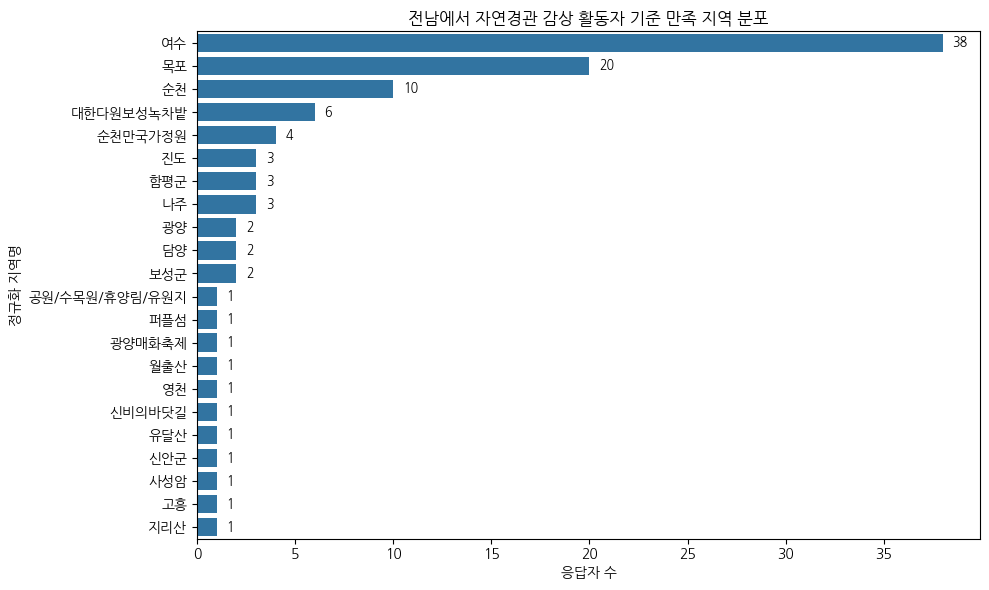

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import koreanize_matplotlib

# 1. 조건 필터링
cond_전남 = df_all['Q9_2a16'] == '전남'
cond_감상참여 = df_all['Q8a03'] == '자연경관 감상'

df_filtered = df_all[cond_전남 & cond_감상참여]

# 2. 만족 지역 칼럼들에서 전라남도 관련 지역 추출
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
matched_regions = df_filtered[satisfied_cols].values.ravel()
matched_regions = [x for x in matched_regions if isinstance(x, str) and ('전남' in x or '전라남도' in x)]

# 3. 지역명 정규화 함수
def normalize_region_name(name):
    if not isinstance(name, str):
        return None
    name = re.sub(r'\(.*?\)', '', name)  # 괄호 안 제거
    name = name.replace('_', '-').replace(' ', '-')  # 구분자 통일
    parts = name.split('-')
    for part in reversed(parts):
        if part.strip() and part.strip() not in ['전라남도', '전남']:
            return part.strip()
    return parts[-1].strip()

# 4. 정규화 및 빈도 계산
matched_regions_norm = pd.Series(matched_regions).map(normalize_region_name)
top_regions = matched_regions_norm.value_counts().sort_values(ascending=False)

# 5. 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title("전남에서 자연경관 감상 활동자 기준 만족 지역 분포")
plt.xlabel("응답자 수")
plt.ylabel("정규화 지역명")

# 수치 라벨 추가
for i, value in enumerate(top_regions.values):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **전남5. 전남 방문객 + 만족 지역 전남 + 만족 활동 자연경관**

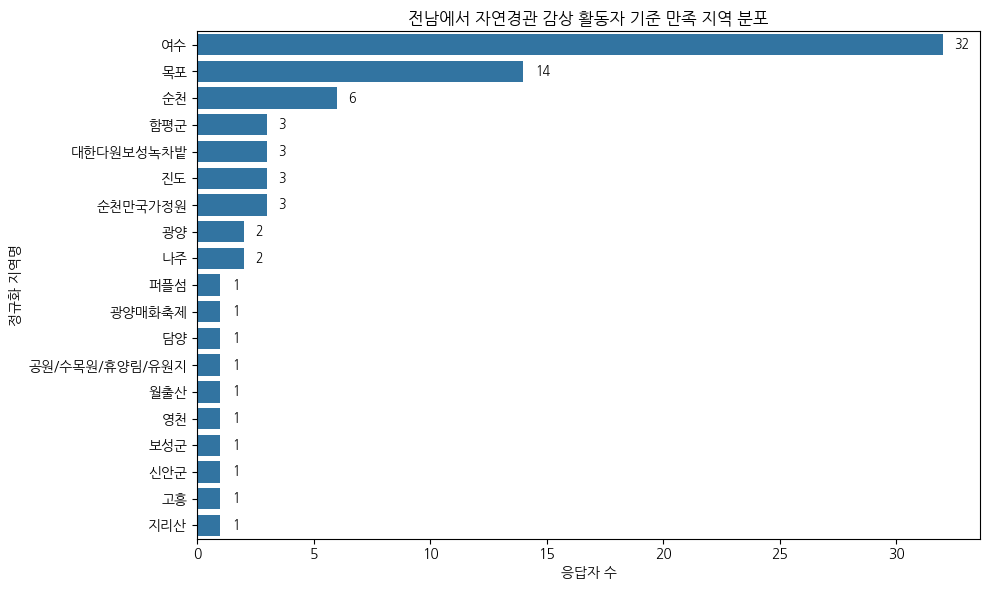

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import koreanize_matplotlib

# 1. 조건 필터링
cond_전남 = df_all['Q9_2a16'] == '전남'
satis_cols = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']
cond_자연경관만족 = df_all[satis_cols].apply(lambda row: '자연경관 감상' in row.values, axis=1)

df_filtered = df_all[cond_전남 & cond_자연경관만족]

# 2. 만족 지역 칼럼들에서 전라남도 관련 지역 추출
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
matched_regions = df_filtered[satisfied_cols].values.ravel()
matched_regions = [x for x in matched_regions if isinstance(x, str) and ('전남' in x or '전라남도' in x)]

# 3. 지역명 정규화 함수
def normalize_region_name(name):
    if not isinstance(name, str):
        return None
    name = re.sub(r'\(.*?\)', '', name)  # 괄호 안 제거
    name = name.replace('_', '-').replace(' ', '-')  # 구분자 통일
    parts = name.split('-')
    for part in reversed(parts):
        if part.strip() and part.strip() not in ['전라남도', '전남']:
            return part.strip()
    return parts[-1].strip()

# 4. 정규화 및 빈도 계산
matched_regions_norm = pd.Series(matched_regions).map(normalize_region_name)
top_regions = matched_regions_norm.value_counts().sort_values(ascending=False)

# 5. 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title("전남에서 자연경관 감상 활동자 기준 만족 지역 분포")
plt.xlabel("응답자 수")
plt.ylabel("정규화 지역명")

# 수치 라벨 추가
for i, value in enumerate(top_regions.values):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **세종1. 유적지 방문 2등 세종**
- 하지만, 유적지 방문에 만족했는가는 포함되어 있지 않음!!

In [40]:
# 만족지역에 '전남' 또는 '전라남도'가 포함된 응답자
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
def contains_세종(row):
    return any(isinstance(val, str) and ('세종' in val or '세종시' in val) for val in row)

세종포함_mask = df_all[satisfied_cols].apply(contains_세종, axis=1)

# 세종에 방문한 사람 (Q9_2a08 == '세종')
세종활동_mask = df_all['Q9_2a08'] == '세종'

# 두 조건 모두 만족하는 최종 필터
최종세종_mask = 세종포함_mask & 세종활동_mask
filtered_df_sj = df_all.loc[최종세종_mask, ['pnid', 'Q9_2a08'] + satisfied_cols]

# 결과 확인
print(f"🎯 조건을 모두 만족하는 응답자 수: {len(filtered_df_sj)}")
display(filtered_df_sj.head(10))


🎯 조건을 모두 만족하는 응답자 수: 36


,pnid,Q9_2a08,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5
598,1061,세종,세종시-세종시,NaN,NaN,NaN,NaN
810,1418,세종,세종시-세종시,NaN,NaN,NaN,NaN
2070,3165,세종,세종시-세종시,NaN,NaN,NaN,NaN
3748,5339,세종,세종시-세종시,NaN,NaN,NaN,NaN
4310,6111,세종,세종시-세종시,NaN,NaN,NaN,NaN
4875,7011,세종,세종시-세종시,NaN,NaN,NaN,NaN
5844,8417,세종,세종시-세종시,NaN,NaN,NaN,NaN
7019,9998,세종,세종시-세종시,NaN,NaN,NaN,NaN
8064,11504,세종,세종시-세종시,NaN,NaN,NaN,NaN
8919,12580,세종,세종시-세종시,NaN,NaN,NaN,NaN


## **세종2. 세종 방문객 중 만족지역에 세종이 포함OX 분포**

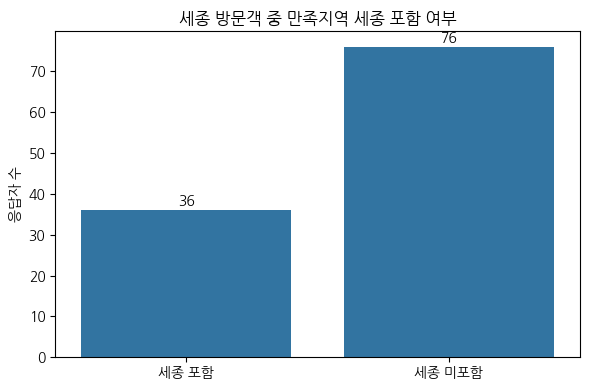

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # 한글 폰트 적용

# 세종 활동자 수
total_세종_활동자 = (df_all['Q9_2a08'] == '세종').sum()

# 만족지역에 세종 포함된 사람 수
matched_sj = filtered_df_sj.shape[0]

# 데이터 준비
labels = ['세종 포함', '세종 미포함']
values = [matched_sj, total_세종_활동자 - matched_sj]

# 시각화
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=values)

# 제목 및 축 설정
plt.title("세종 방문객 중 만족지역 세종 포함 여부")
plt.ylabel("응답자 수")

# 수치 표시
for i, value in enumerate(values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [44]:
print(df_all.columns.tolist())

['pnid', 'MVIT', 'RVIT', 'XRVIT', 'TYP', 'Q1', 'Q1_1a1', 'Q1_1a2', 'Q1_1a3', 'Q2a1', 'Q2a2', 'Q2a3', 'Q2a_dk', 'Q2_1a1', 'Q2_1a2', 'Q2_1a3', 'Q3_1a1', 'Q3_1a2', 'Q3_1a3', 'Q3_2a1', 'Q3_2a2', 'Q3_2a3', 'Q4a1', 'Q4a2', 'Q4a3', 'Q4a_dk', 'Q4_1a1', 'Q4_1a2', 'Q4_1a3', 'Q4_2a1', 'Q4_2a2', 'Q4_2a3', 'Q4_2a_dk', 'Q5', 'Q5_1a01', 'Q5_1a02', 'Q5_1a03', 'Q5_1a04', 'Q5_1a05', 'Q5_1a06', 'Q5_1a07', 'Q5_1a08', 'Q5_1a09', 'Q5_1a10', 'Q5_1a99', 'Q7A', 'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8', 'MQ7_1', 'MQ7_1제외', 'MQ7_2', 'MQ7_1.15제외', 'MQ7_1제외.15제외', 'RQ7_1', 'RQ7_1제외', 'RQ7_2', 'RQ7_1.15제외', 'RQ7_1제외.15제외', 'Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a08', 'Q8a09', 'Q8a10', 'Q8a11', 'Q8a12', 'Q8a13', 'Q8a14', 'Q8a15', 'Q8a16', 'Q8a17', 'Q8a18', 'Q8a19', 'Q8_1a1', 'Q8_1a2', 'Q8_1a3', 'Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5', 'Q9_2a01', 'Q9_2a02', 'Q9_2a03', 'Q9_2a04', 'Q9_2a05', 'Q9_2a06', 'Q9_2a07', 'Q9_2a08', 'Q9_2a09', 'Q9_2a10', 'Q9_2a11', 'Q9

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# 1. 활동별 만족도 피벗 테이블 (2023+2024 통합)
pivot = df_combined.pivot_table(
    index='방문지역',
    columns='활동',
    values='만족도',
    aggfunc=lambda x: np.average(x, weights=df_combined.loc[x.index, "가중치"])
).fillna(0)

# 2. 전남 벡터
target_vector = pivot.loc["전남"].values.reshape(1, -1)

# 3. 거리 계산
distances = euclidean_distances(pivot.values, target_vector).flatten()
pivot["거리"] = distances

# 4. 정렬
similar_regions = pivot.sort_values("거리").drop("전남")  # 자기 자신 제외
similar_regions = similar_regions[["거리"]].head(5)

display(similar_regions)


활동,거리
방문지역,
제주,0.271424
인천,0.300337
강원,0.325838
경기,0.346669
부산,0.383696


| 순위 | 지역명 | 전남과의 유클리드 거리 | 해석                                 |
| -- | --- | ------------ | ---------------------------------- |
| 1  | 제주  | 0.271        | **가장 유사**. 전남과 유사한 자연·식도락 중심 관광 가능 |
| 2  | 인천  | 0.300        | 수도권이지만 자연경관과 식도락 만족도 유사            |
| 3  | 강원  | 0.326        | 전남처럼 자연자원 강세. 복합 관광 전략 유효          |
| 4  | 경기  | 0.347        | 수도권 접근성+체험 요소 유사                   |
| 5  | 부산  | 0.384        | 바다 중심 도시로, 자연·식도락 복합 가능            |


/tmp/ipython-input-57-2446567066.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_distance.index, y=df_distance['거리'], palette="Blues_d")


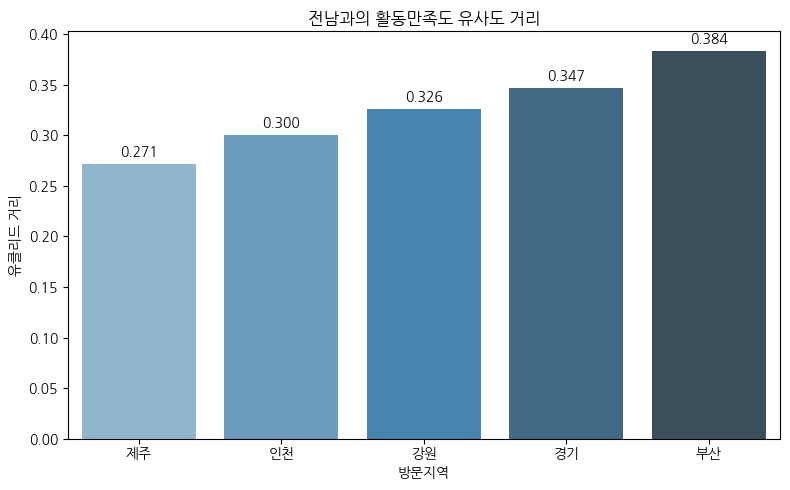

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 거리 데이터프레임 구성
distance_data = {
    '방문지역': ['제주', '인천', '강원', '경기', '부산'],
    '거리': [0.271424, 0.300337, 0.325838, 0.346669, 0.383696]
}
df_distance = pd.DataFrame(distance_data).set_index('방문지역')

# ✅ 거리 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_distance.index, y=df_distance['거리'], palette="Blues_d")
plt.title("전남과의 활동만족도 유사도 거리")
plt.ylabel("유클리드 거리")
plt.xlabel("방문지역")

# 수치 표시
for i, value in enumerate(df_distance['거리']):
    ax.text(i, value + 0.005, f"{value:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipython-input-62-2696431021.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['PC1'][i]+0.05, pca_df['PC2'][i], pca_df.index[i], fontsize=9)


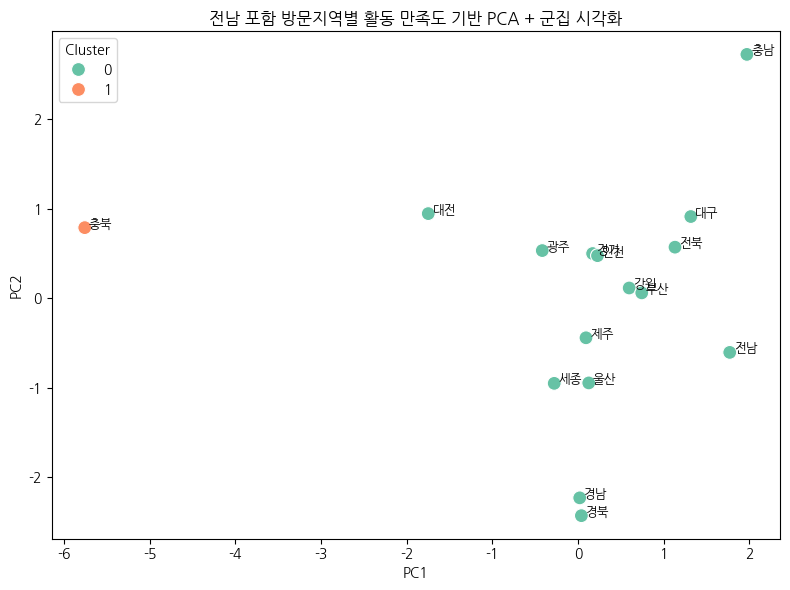

In [62]:
# '거리' 컬럼이 pivot_df에 없는 경우를 대비해 예외처리하여 진행
pivot_df_no_error = pivot_df.copy()
if '거리' in pivot_df_no_error.columns:
    pivot_df_no_error = pivot_df_no_error.drop(columns='거리')

# PCA 적용
X_scaled = scaler.fit_transform(pivot_df_no_error)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 군집
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 시각화용 데이터프레임
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=pivot_df_no_error.index)
pca_df['Cluster'] = labels

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i]+0.05, pca_df['PC2'][i], pca_df.index[i], fontsize=9)
plt.title("전남 포함 방문지역별 활동 만족도 기반 PCA + 군집 시각화")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


In [63]:
from sklearn.metrics import silhouette_score

# k값 후보군 설정
range_n_clusters = range(2, 6)  # 데이터 수가 적을 경우 2~5 정도 권장
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)  # 또는 원본 X_scaled 사용 가능
    score = silhouette_score(X_pca, labels)  # PCA 결과 또는 원본에 적용 가능
    silhouette_scores.append((k, score))

# 결과 확인용 데이터프레임
pd.DataFrame(silhouette_scores, columns=['k', 'silhouette_score'])


,k,silhouette_score
0,2,0.639022
1,3,0.330421
2,4,0.330058
3,5,0.293243


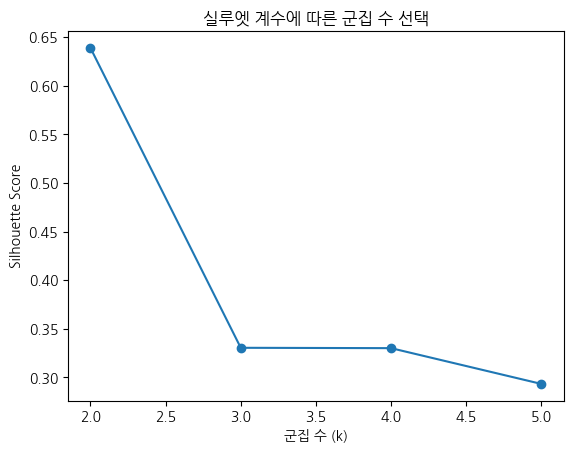

In [64]:
plt.plot(*zip(*silhouette_scores), marker='o')
plt.title("실루엣 계수에 따른 군집 수 선택")
plt.xlabel("군집 수 (k)")
plt.ylabel("Silhouette Score")
plt.show()
